In [1]:
using Revise

┌ Info: Recompiling stale cache file /Users/arnavsood/.julia/compiled/v1.0/Revise/M1Qoh.ji for Revise [295af30f-e4ad-537b-8983-00126c2a3abe]
└ @ Base loading.jl:1190


In [2]:
using PerlaTonettiWaugh

┌ Info: Recompiling stale cache file /Users/arnavsood/.julia/compiled/v1.0/PerlaTonettiWaugh/Zi3ee.ji for PerlaTonettiWaugh [d2cacc76-b06b-11e8-362b-f18d03a16405]
└ @ Base loading.jl:1190


In [3]:
using LinearAlgebra, Compat, Statistics

In [9]:
# Define common objects. 
params = parameter_defaults()
settings = settings_defaults()
d_0 = params.d_T
d_T = params.d_T
params_0 = merge(params, (d = d_T + 0.005,)) # parameters to be used at t = 0
params_T = merge(params, (d = d_T,)) # parameters to be used at t = T
z_grid = settings.z
M = length(z_grid)

# solve for stationary solution at t = 0
stationary_sol_0 = stationary_numerical(params_0, z_grid) # solution at t = 0
stationary_sol = stationary_numerical(params_T, z_grid) # solution at t = T

Ω_0 = stationary_sol_0.Ω;
Ω_T = stationary_sol.Ω;

In [10]:
settings = merge(settings, (params_T = params_T, stationary_sol_T = stationary_sol, Ω_0 = Ω_0));

In [12]:
sol = solve_full_model_python(settings)

(solution = (results = 12×15 DataFrames.DataFrame. Omitted printing of 9 columns
│ Row │ t       │ g         │ z_hat   │ Ω       │ E         │ v_0     │
│     │ Float64 │ Float64   │ Float64 │ Float64 │ Float64   │ Float64 │
├─────┼─────────┼───────────┼─────────┼─────────┼───────────┼─────────┤
│ 1   │ 0.0     │ 0.020566  │ 1.40493 │ 1.26163 │ 0.0522828 │ 1.15936 │
│ 2   │ 19.52   │ 0.02062   │ 1.40385 │ 1.25589 │ 0.0530451 │ 1.15936 │
│ 3   │ 29.76   │ 0.020618  │ 1.40389 │ 1.25612 │ 0.0530108 │ 1.15936 │
│ 4   │ 34.88   │ 0.0206156 │ 1.40394 │ 1.2563  │ 0.0529998 │ 1.15936 │
│ 5   │ 37.44   │ 0.0206159 │ 1.40393 │ 1.25629 │ 0.0529996 │ 1.15936 │
│ 6   │ 38.72   │ 0.0206156 │ 1.40393 │ 1.25629 │ 0.0530005 │ 1.15936 │
│ 7   │ 39.36   │ 0.0206156 │ 1.40393 │ 1.25629 │ 0.0530003 │ 1.15936 │
│ 8   │ 39.68   │ 0.0206156 │ 1.40393 │ 1.25629 │ 0.0530002 │ 1.15936 │
│ 9   │ 39.84   │ 0.0206157 │ 1.40393 │ 1.25629 │ 0.0530001 │ 1.15936 │
│ 10  │ 39.92   │ 0.0206157 │ 1.40393 │ 1.25629 │ 0.053

In [16]:
sol.solobj.x

14-element Array{Float64,1}:
 -1.2310225306215423   
 -0.7138548313749906   
 -0.5434754826133947   
 -0.49987974468434965  
 -0.2374443525489834   
 -0.0914271651097854   
 -0.11796223792094691  
  0.0942352331744569   
 -0.03555500856445973  
  0.08315311296871812  
 -0.005689223918791508 
  0.07667476769858748  
  0.010446304520706997 
 -0.0016020871291026165

In [6]:
using SoftGlobalScope

In [17]:
@softscope while d_0 <= params.d_0
    d_0 += 0.05
    params_0 = merge(params, (d = d_0,))
    Ω_0 = stationary_numerical(params_0, z_grid).Ω
    settings = merge(settings, (Ω_0 = Ω_0,))
    result = solve_full_model_python(settings)
    settings = merge(settings, (global_transition_x0 = result.solobj.x,))
end

In [18]:
settings

(z_max = 5, z = [0.0, 0.000250627, 0.000501253, 0.00075188, 0.00100251, 0.00125313, 0.00150376, 0.00175439, 0.00200501, 0.00225564  …  4.63636, 4.67677, 4.71717, 4.75758, 4.79798, 4.83838, 4.87879, 4.91919, 4.9596, 5.0], Δ_E = 1.0e-6, iterations = 2, ode_solve_algorithm = Sundials.CVODE_BDF{:Newton,:Dense}(0, 0, 0, 0, false, 10, 5, 7, 3, 10), g_node_count = 30, T = 40.0, t = 0.0:4.444444444444445:40.0, g = [0.0306157, 0.0406157, 0.0506157, 0.0606157, 0.0706157, 0.0806157, 0.0906157, 0.100616, 0.110616, 0.120616], E_node_count = 15, entry_residuals_nodes_count = 15, global_transition_x0 = [-0.968323, -0.870385, -0.687599, -0.52376, -0.397741, -0.2937, -0.215597, -0.163005, -0.0993567, -0.0899432, -0.052833, -0.0438978, -0.0493605, -0.044236], global_transition_lb = [-0.928323, -0.793123, -0.604936, -0.492704, -0.335835, -0.249741, -0.24268, -0.125186, -0.0948087, -0.0877639, -0.0573027, -0.0451288, -0.0307141, -0.0301002], global_transition_ub = [-0.928323, -0.793123, -0.604936, -0.4927

In [20]:
result = solve_full_model_python(settings)

(solution = (results = 22×15 DataFrames.DataFrame. Omitted printing of 9 columns
│ Row │ t       │ g         │ z_hat   │ Ω       │ E         │ v_0     │
│     │ Float64 │ Float64   │ Float64 │ Float64 │ Float64   │ Float64 │
├─────┼─────────┼───────────┼─────────┼─────────┼───────────┼─────────┤
│ 1   │ 0.0     │ 0.0151923 │ 1.51617 │ 1.80335 │ 0.022468  │ 1.15306 │
│ 2   │ 1.06643 │ 0.0158786 │ 1.50498 │ 1.74642 │ 0.0233872 │ 1.15608 │
│ 3   │ 2.49967 │ 0.0167403 │ 1.49083 │ 1.67567 │ 0.0250252 │ 1.15872 │
│ 4   │ 3.93292 │ 0.017332  │ 1.47991 │ 1.61255 │ 0.0275405 │ 1.1594  │
│ 5   │ 7.48235 │ 0.0182206 │ 1.45671 │ 1.49262 │ 0.0346801 │ 1.15925 │
│ 6   │ 11.0318 │ 0.0189694 │ 1.43913 │ 1.41249 │ 0.0399549 │ 1.15955 │
│ 7   │ 14.5812 │ 0.0194815 │ 1.42777 │ 1.35879 │ 0.0440436 │ 1.15972 │
│ 8   │ 18.1307 │ 0.0199058 │ 1.4191  │ 1.3234  │ 0.0467842 │ 1.15966 │
│ 9   │ 21.6801 │ 0.0200687 │ 1.41389 │ 1.29956 │ 0.0491793 │ 1.15926 │
│ 10  │ 25.2295 │ 0.0203163 │ 1.41047 │ 1.28526 │ 0.050

In [24]:
solved = result.solution;

In [26]:
using Plots

In [36]:
dataframe = solved.results;

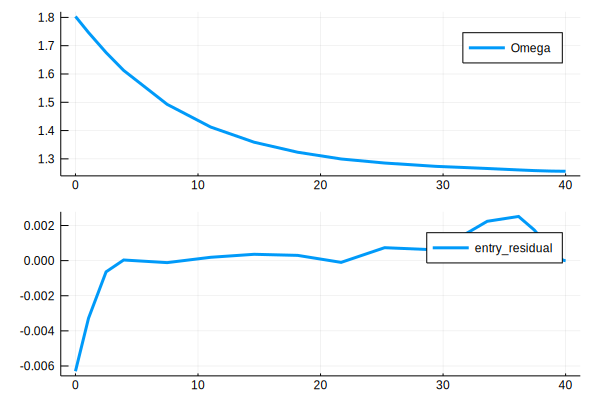

In [37]:
plot_Ω = plot(dataframe.t, dataframe.Ω, label = "Omega", lw = 3)
plot_residual = plot(dataframe.t, dataframe.entry_residual, label = "entry_residual", lw = 3)
plot(plot_Ω, plot_residual, layout = (2,1))

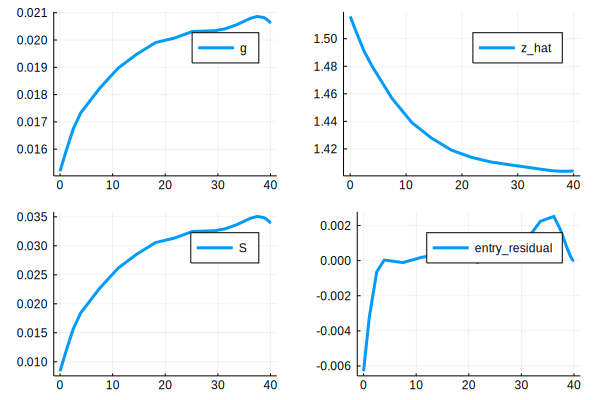

In [38]:
plot1 = plot(dataframe.t, dataframe.g, label = "g", lw = 3)
plot2 = plot(dataframe.t, dataframe.z_hat, label = "z_hat", lw = 3)
plot3 = plot(dataframe.t, dataframe.S, label = "S", lw = 3)
plot4 = plot(dataframe.t, dataframe.entry_residual, label = "entry_residual", lw = 3)
plot(plot1, plot2, plot3, plot4, layout=(2,2))

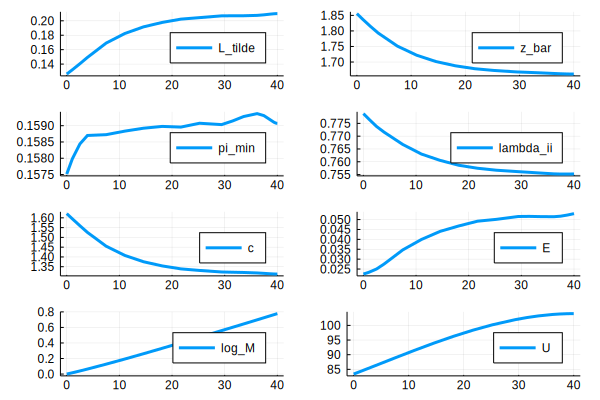

In [39]:
plot1 = plot(dataframe.t, dataframe.L_tilde, label = "L_tilde", lw = 3)
plot2 = plot(dataframe.t, dataframe.z_bar, label = "z_bar", lw = 3)
plot3 = plot(dataframe.t, dataframe.π_min, label = "pi_min", lw = 3)
plot4 = plot(dataframe.t, dataframe.λ_ii, label = "lambda_ii", lw = 3)
plot5 = plot(dataframe.t, dataframe.c, label = "c", lw = 3)
plot6 = plot(dataframe.t, dataframe.E, label = "E", lw = 3)
plot7 = plot(dataframe.t, dataframe.log_M, label = "log_M", lw = 3)
plot8 = plot(dataframe.t, dataframe.U, label = "U", lw = 3)
plot(plot1, plot2, plot3, plot4, plot5, plot6, plot7, plot8, layout=(4,2))

In [40]:
# Define common objects. 
params = parameter_defaults()
settings = settings_defaults()
d_0 = params.d_T
d_T = params.d_T
params_0 = merge(params, (d = d_T + 0.005,)) # parameters to be used at t = 0
params_T = merge(params, (d = d_T,)) # parameters to be used at t = T
z_grid = settings.z
M = length(z_grid)

# solve for stationary solution at t = 0
stationary_sol_0 = stationary_numerical(params_0, z_grid) # solution at t = 0
stationary_sol = stationary_numerical(params_T, z_grid) # solution at t = T

Ω_0 = stationary_sol_0.Ω;
Ω_T = stationary_sol.Ω;

In [41]:
settings = merge(settings, (params_T = params_T, stationary_sol_T = stationary_sol, Ω_0 = Ω_0));

In [42]:
settings

(z_max = 5, z = [0.0, 0.000250627, 0.000501253, 0.00075188, 0.00100251, 0.00125313, 0.00150376, 0.00175439, 0.00200501, 0.00225564  …  4.63636, 4.67677, 4.71717, 4.75758, 4.79798, 4.83838, 4.87879, 4.91919, 4.9596, 5.0], Δ_E = 1.0e-6, iterations = 2, ode_solve_algorithm = Sundials.CVODE_BDF{:Newton,:Dense}(0, 0, 0, 0, false, 10, 5, 7, 3, 10), g_node_count = 30, T = 40.0, t = 0.0:4.444444444444445:40.0, g = [0.0306157, 0.0406157, 0.0506157, 0.0606157, 0.0706157, 0.0806157, 0.0906157, 0.100616, 0.110616, 0.120616], E_node_count = 15, entry_residuals_nodes_count = 15, global_transition_x0 = [-0.928323, -0.793123, -0.604936, -0.492704, -0.335835, -0.249741, -0.24268, -0.125186, -0.0948087, -0.0877639, -0.0573027, -0.0451288, -0.0307141, -0.0301002], global_transition_lb = [-0.928323, -0.793123, -0.604936, -0.492704, -0.335835, -0.249741, -0.24268, -0.125186, -0.0948087, -0.0877639, -0.0573027, -0.0451288, -0.0307141, -0.0301002], global_transition_ub = [-0.928323, -0.793123, -0.604936, -0.

In [43]:
result = solve_full_model_python(settings)

(solution = (results = 12×15 DataFrames.DataFrame. Omitted printing of 9 columns
│ Row │ t       │ g         │ z_hat   │ Ω       │ E         │ v_0     │
│     │ Float64 │ Float64   │ Float64 │ Float64 │ Float64   │ Float64 │
├─────┼─────────┼───────────┼─────────┼─────────┼───────────┼─────────┤
│ 1   │ 0.0     │ 0.0205662 │ 1.40493 │ 1.26163 │ 0.0522798 │ 1.15936 │
│ 2   │ 19.52   │ 0.0206198 │ 1.40385 │ 1.25592 │ 0.0530393 │ 1.15936 │
│ 3   │ 29.76   │ 0.0206168 │ 1.40391 │ 1.25621 │ 0.0530055 │ 1.15936 │
│ 4   │ 34.88   │ 0.0206157 │ 1.40393 │ 1.25629 │ 0.0529999 │ 1.15936 │
│ 5   │ 37.44   │ 0.0206158 │ 1.40393 │ 1.25629 │ 0.0529999 │ 1.15936 │
│ 6   │ 38.72   │ 0.0206156 │ 1.40393 │ 1.25629 │ 0.0530003 │ 1.15936 │
│ 7   │ 39.36   │ 0.0206156 │ 1.40393 │ 1.25629 │ 0.0530002 │ 1.15936 │
│ 8   │ 39.68   │ 0.0206157 │ 1.40393 │ 1.25629 │ 0.0530001 │ 1.15936 │
│ 9   │ 39.84   │ 0.0206157 │ 1.40393 │ 1.25629 │ 0.0530001 │ 1.15936 │
│ 10  │ 39.92   │ 0.0206157 │ 1.40393 │ 1.25629 │ 0.053

In [ ]:
@time @softscope while d_0 <= params.d_0
    d_0 += 0.05
    params_0 = merge(params, (d = d_0,))
    Ω_0 = stationary_numerical(params_0, z_grid).Ω
    settings = merge(settings, (Ω_0 = Ω_0,))
    result = solve_full_model_python(settings)
    settings = merge(settings, (global_transition_x0 = result.solobj.x,))
end